# 0.Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

sns.set_style("darkgrid")

# 3. Data Exploring

In [3]:
df = pd.read_csv("../data/imdb_clean.csv")
df.head()

,Name,Date,Rate,Votes,Genre,Duration,Certificate,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163,"Action, Adventure, Thriller",163,PG-13,2,3,2,2,3
1,The Guilty,2021,6.3,64375,"Crime, Drama, Thriller",90,R,1,1,4,1,3
2,The Many Saints of Newark,2021,6.4,27145,"Crime, Drama",120,R,3,4,4,3,3
3,Venom: Let There Be Carnage,2021,6.4,30443,"Action, Adventure, Sci-Fi",97,PG-13,1,3,3,2,3
4,Dune,2021,8.3,84636,"Action, Adventure, Drama",155,PG-13,1,3,1,2,3


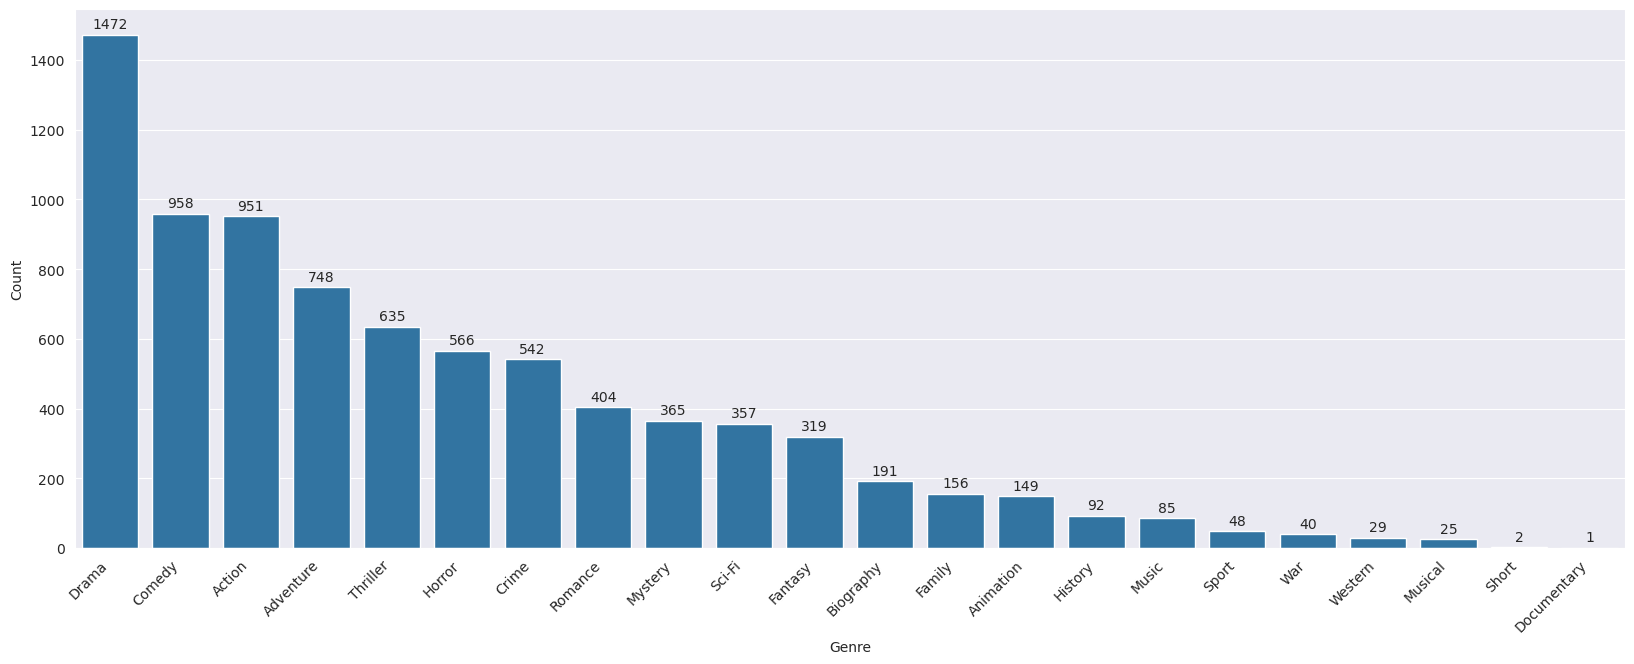

In [4]:
genres = pd.Series(list(set(np.concatenate(df["Genre"].str.split(", ").values))))
genres_count = genres.apply(lambda x: df[df["Genre"].str.contains(x)]["Name"].count())

plt.figure(figsize=(20, 7))
ax = sns.barplot(data = pd.DataFrame({"Genre": genres, "Count": genres_count}).sort_values("Count", ascending=False), x = "Genre", y = "Count", color = "C0")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

for p in ax.patches:
    ax.annotate(f'{p.get_height():0.0f}', (p.get_x() + 0.4 , p.get_height() + 30), va = "center", ha = "center")

Các thể loại phim có phân bố không đồng đều, phần lớn phim được xếp vào các thể loại `"Drama"`, `"Comedy"`, `"Action"`, `"Adventure"`. Một số thể loại khác có ít phim là `"Sport"`, `"War"`, `"Western"`, `"Musical"`, `"Short"`, `"Documentary"`. Đặc biệt thể loại `"Documentary"` chỉ có 1 phim duy nhất

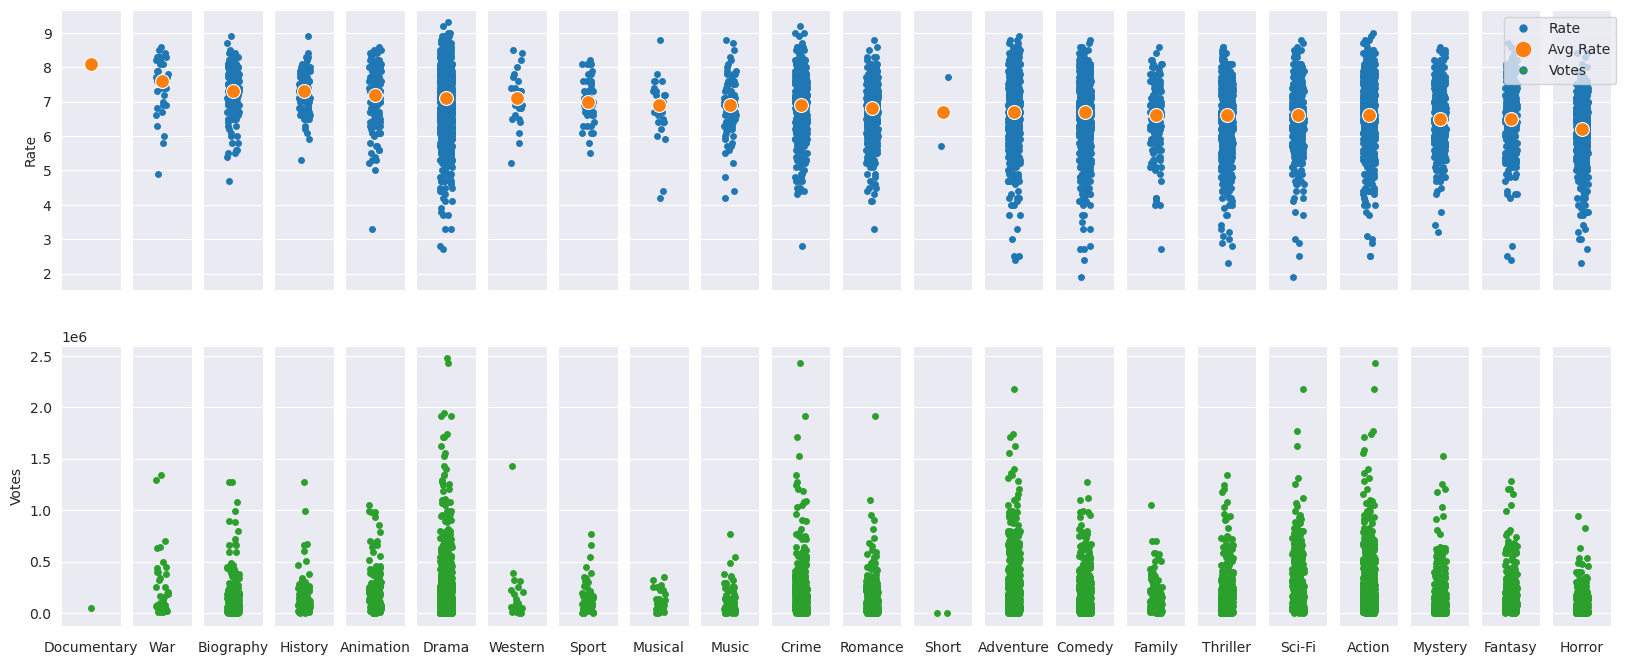

In [6]:
genres_agg = pd.DataFrame(
    {"Genre": genres, 
     "rate_median": genres.apply(lambda x: df[df["Genre"].str.contains(x)]["Rate"].median()),
     "vote_median": genres.apply(lambda x: df[df["Genre"].str.contains(x)]["Votes"].median()),
    }
).sort_values("rate_median", ascending = False).set_index("Genre")

order = genres_agg.index

fig, axes = plt.subplots(ncols = genres.shape[0], nrows = 2, figsize = (20, 8), sharey = "row", sharex = True)

for ax, genre in zip(axes[0], order):
    sns.stripplot(y = df[df["Genre"].str.contains(genre)]["Rate"], ax = ax)
    sns.scatterplot(x = [0], y = genres_agg.loc[genre, "rate_median"], color = "C1", ax = ax, s = 100, zorder = 10)
    ax.set_ylabel("")
    ax.set_xlim(-0.5, 0.5)

for ax, genre in zip(axes[1], order):
    # sns.barplot(x = [0], y = [genres_agg.loc[genre, "vote_median"]], color = "C0", ax = ax)
    sns.stripplot(y = df[df["Genre"].str.contains(genre)]["Votes"], ax = ax, color = "C2")
    ax.set_xticklabels([])
    ax.set_xlabel(genre)

axes[0, -1].legend(
    handles = [
        Line2D([0], [0], marker='o', lw = 0, label='Rate', markerfacecolor='C0', markersize=5),
        Line2D([0], [0], marker='o', lw = 0, label='Avg Rate', markerfacecolor='C1', markeredgecolor='C1', markersize=10),
        Line2D([0], [0], marker='o', lw = 0, label='Votes', markerfacecolor='C2', markersize=5),
    ],
    loc = "upper right", bbox_to_anchor = (1.2, 1)
)

# for ax in axes[1]:
#     #annnotate the median vote
#     ax.annotate(f'{genres_agg.loc[ax.get_xlabel(), "vote_median"]:0.0f}', (0, genres_agg.loc[ax.get_xlabel(), "vote_median"] + 10000), ha = "center")

# axes[1, 1].set_ylim(0, 320000)
axes[0, 0].set_ylabel("Rate")
axes[1, 0].set_ylabel("Votes");

Các thể loại có ít phim có phân bố điểm nhìn chung nhỉnh hơn các thể loại có nhiều phim. 

Nhìn vào số lượng vote và số lượng phim, các thể loại có số lượng ít như `"Documentary"`, `"Western"`, `"Sport"`, `"Musical"` hay `"Sport"` có ít lượng votes hơn, có thể do nhận được ít sự quan tâm hơn, do đó ít nhà sản xuất hơn, các nhà sản xuất đầu tư chỉn chu hơn vào bộ phim.

Còn đối với các thể loại có số lượng nhiều hơn như `"Crime"`, `"Drama"`, `"Adventure"`, `"Comedy"` có số lượng votes nhiều hơn, nghĩa là có nhiều sự quan tâm hơn, đồng nghĩa với với việc sẽ có nhiều nhà sản xuất các thể loại phim này. Khi số lượng nhà xuất suất tăng lên, chất lượng phim cũng sẽ dàn trải hơn, do đó ta thấy phân bố điểm của các thể loại này trải rộng hơn về phía dưới.

Tuy nhiên nhận xét trên chỉ là giả thuyết của nhóm, còn khá nhiều yếu tố khác ảnh hưởng đến điểm của từng thể loại phim.


,Name,Date,Rate,Votes,Genre,Duration,Certificate,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163,"Action, Adventure, Thriller",163,PG-13,2,3,2,2,3
1,The Guilty,2021,6.3,64375,"Crime, Drama, Thriller",90,R,1,1,4,1,3
2,The Many Saints of Newark,2021,6.4,27145,"Crime, Drama",120,R,3,4,4,3,3
3,Venom: Let There Be Carnage,2021,6.4,30443,"Action, Adventure, Sci-Fi",97,PG-13,1,3,3,2,3
4,Dune,2021,8.3,84636,"Action, Adventure, Drama",155,PG-13,1,3,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3100,Chugyeokja,2008,7.8,62423,"Action, Crime, Thriller",125,R,2,4,3,2,4
3101,The Human Centipede II (Full Sequence),2011,3.8,37492,Horror,91,R,4,4,4,2,4
3102,Before the Devil Knows You're Dead,2007,7.3,100668,"Crime, Drama, Thriller",117,R,4,3,4,4,4
3103,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100,PG-13,1,1,2,3,1


In [16]:
data = df[df["Genre"].str.contains("Action")][["Nudity", "Violence", "Profanity", "Alcohol", "Frightening"]].mean()

(1.0, 4.0)

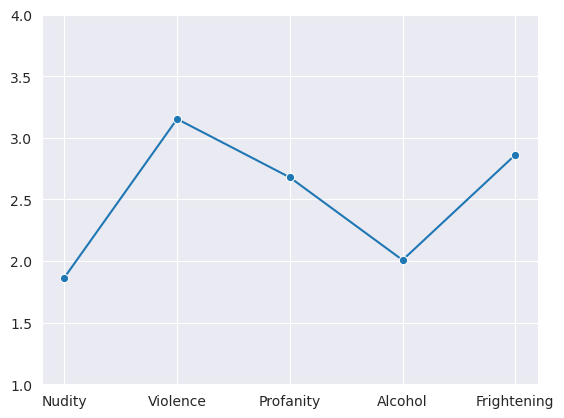

In [20]:
ax = sns.lineplot(x = data.index, y = data.values, marker = "o", color = "C0")

ax.set_ylim(1, 4)